In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [12]:
df.shape

(99999, 226)

In [13]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [14]:
df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [15]:
round(df.isnull().sum()/len(df.index)*100,2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

# Data Cleaning and Preparation

In [16]:
#Dataframe for compiled null values better
nulldf=pd.DataFrame(df.isnull().sum()).reset_index()
nulldf.columns=['Col','nullval']
nulldf.head()

,Col,nullval
0,mobile_number,0
1,circle_id,0
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018


In [17]:
#Check for columns having > 70% null values
def return_null_percentage(df,per):
    nulldf=pd.DataFrame(df.isnull().sum()).reset_index()
    nulldf.columns=['Col','nullval']
    col_list=list(nulldf[round(nulldf['nullval']/len(df.index)*100,2)>per]['Col'])
    return round(df[col_list].isnull().sum()/len(df.index)*100,2)

In [18]:
#Imputing missing values for total and average rech_amt
rech_cols_list=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for col in rech_cols_list:
    df[col].fillna(0,inplace=True)
    
df[rech_cols_list].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [19]:
#Check for columns having > 70% null values
return_null_percentage(df,70)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7     

In [20]:
#Fixing categorical vars 
cat_var_list=['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

modes=df[cat_var_list].agg('mode')

for col in cat_var_list:
    df[col]=df[col].fillna(modes[col])

In [21]:
#Dummify categorical variables
def doDummies(df,col):
    print("Col being dummified: " , col)
    dff = pd.get_dummies(df[col],prefix=col.split("_")[0]+"_"+col.split("_")[-1],drop_first=True)
    dx = pd.concat([df,dff], axis=1)
    return dx

In [22]:
print("Before dummy cols: ",df.shape)
for col in cat_var_list:
    df = doDummies(df,col)
    
df.drop(cat_var_list, axis=1, inplace=True)
df.head()

Before dummy cols:  (99999, 226)
Col being dummified:  night_pck_user_6
Col being dummified:  night_pck_user_7
Col being dummified:  night_pck_user_8
Col being dummified:  night_pck_user_9
Col being dummified:  fb_user_6
Col being dummified:  fb_user_7
Col being dummified:  fb_user_8
Col being dummified:  fb_user_9


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,jun_vbc_3g,sep_vbc_3g,night_6_1.0,night_7_1.0,night_8_1.0,night_9_1.0,fb_6_1.0,fb_7_1.0,fb_8_1.0,fb_9_1.0
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,101.20,3.58,0,0,0,0,1,1,1,1
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0.00,0.00,0,0,0,0,0,1,1,0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,4.17,0.00,0,0,0,0,0,0,0,1
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0.00,0.00,0,0,0,0,0,0,0,0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.00,0.00,0,0,0,0,0,0,0,0


In [23]:
nulldf_2 = pd.DataFrame(return_null_percentage(df,70).reset_index())
nulldf_2.columns=['Col','nulls']
nulldf_2

,Col,nulls
0,date_of_last_rech_data_6,74.85
1,date_of_last_rech_data_7,74.43
2,date_of_last_rech_data_8,73.66
3,date_of_last_rech_data_9,74.08
4,max_rech_data_6,74.85
5,max_rech_data_7,74.43
6,max_rech_data_8,73.66
7,max_rech_data_9,74.08
8,count_rech_2g_6,74.85
9,count_rech_2g_7,74.43


In [24]:
df.shape

(99999, 226)

In [25]:
##Clearing all columns with > 70% nulls

df.drop(list(nulldf_2['Col']), axis=1, inplace=True)
return_null_percentage(df,70)


Series([], dtype: float64)

In [26]:
df.shape

(99999, 202)

In [27]:
#Checking for other cols with null values > 5% < 70%
return_null_percentage(df,5)

onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_8        5.38
std_og_mou_9        7.75
isd_og_mou_8        5.38
isd_og_mou_9        7.75
spl_og_mou_8        5.38
spl_og_mou_9        7.75
og_others_8         5.38
og_others_9         7.75
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75


# High value customers

In [28]:
#Finding out total data recharge amount per month 
# total_rech_data_amt_X = total_rech_data_X * av_rech_amt_data_X

df['total_rech_data_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_data_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_rech_data_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['total_rech_data_amt_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']

In [29]:
#Dropping total_rech_data_X and av_rech_amt_data_X
df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
         ,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
       , axis=1, inplace=True)


In [30]:
df.shape

(99999, 198)

In [31]:
# Computing the threshold for the high value customers
#Those who have recharged with an amount more than or equal to X, 
#where X is the 70th percentile of the average recharge amount in the first two months .

avg_amt = (df['total_rech_amt_6'].fillna(0) + df['total_rech_data_amt_6'].fillna(0) 
           +df['total_rech_amt_7'].fillna(0) + df['total_rech_data_amt_7'].fillna(0))/2
avg_amt.describe(percentiles=[.25,.50,.70,.75])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
max      61236.000000
dtype: float64

In [32]:
# rech_amt_cutoff = 70% cutoff
rech_amt_cutoff = np.percentile(avg_amt,70)
rech_amt_cutoff

478.0

In [33]:
df = df[avg_amt > rech_amt_cutoff]

In [34]:
df.shape

(29953, 198)

# Catching Churn Customers

In [35]:
churn_probable_df = df['total_ic_mou_9'] + df['total_og_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']
churn_probable_df==0
df['churn'] = np.where(churn_probable_df==0,1,0)

In [36]:
#Dropping all month 9 cols i.e. _9 cols
col_month_9 = [x for x in df.columns if x.split("_")[-1]=="9" ]
col_month_9.append('fb_9_1.0')
col_month_9.append('night_9_1.0')
col_month_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_rech_data_amt_9',
 'fb_9_1.0',
 'night_9_1.0']

In [37]:
df.drop(col_month_9, axis=1, inplace=True)

In [38]:
df.shape

(29953, 152)

# EDA

In [39]:
df.nunique().sort_values(ascending = True).head(60)

circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
std_og_t2c_mou_7            1
std_og_t2c_mou_8            1
std_ic_t2o_mou_6            1
std_ic_t2o_mou_7            1
std_og_t2c_mou_6            1
std_ic_t2o_mou_8            1
churn                       2
night_6_1.0                 2
night_8_1.0                 2
night_7_1.0                 2
fb_7_1.0                    2
fb_8_1.0                    2
fb_6_1.0                    2
monthly_2g_6                5
monthly_2g_8                6
monthly_2g_7                6
monthly_3g_6               12
monthly_3g_8               12
monthly_3g_7               15
sachet_3g_6                25
sachet_3g_7                27
sachet_3g_8                29
date_of_last_rech_6        30
sachet_2g_6                31
date_of_last_rech_7        31
date_of_last_rech_8        31
sachet_2g_

In [40]:
df.rename({'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7',
           'jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [41]:
# Check for categorical variables which have <4 uniques
cat_df = pd.DataFrame(df.nunique()).reset_index()
cat_df.columns=['Cols','uniques']
cat_df[cat_df['uniques']<=4]

,Cols,uniques
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [42]:
cat_df[cat_df['uniques']==1].reset_index()

,index,Cols,uniques
0,1,circle_id,1
1,2,loc_og_t2o_mou,1
2,3,std_og_t2o_mou,1
3,4,loc_ic_t2o_mou,1
4,5,last_date_of_month_6,1
5,6,last_date_of_month_7,1
6,7,last_date_of_month_8,1
7,47,std_og_t2c_mou_6,1
8,48,std_og_t2c_mou_7,1
9,49,std_og_t2c_mou_8,1


In [43]:
def one_val_count(df,x):
    for i in x:
        print("Null counts for: ",i," ",df[i].isnull().sum())
        print("Val counts for: ",i," ",df[i].value_counts())

In [44]:
one_val_cols = list(cat_df[cat_df['uniques']==1]['Cols'])
one_val_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [45]:
one_val_count(df,one_val_cols)

Null counts for:  circle_id   0
Val counts for:  circle_id   109    29953
Name: circle_id, dtype: int64
Null counts for:  loc_og_t2o_mou   223
Val counts for:  loc_og_t2o_mou   0.0    29730
Name: loc_og_t2o_mou, dtype: int64
Null counts for:  std_og_t2o_mou   223
Val counts for:  std_og_t2o_mou   0.0    29730
Name: std_og_t2o_mou, dtype: int64
Null counts for:  loc_ic_t2o_mou   223
Val counts for:  loc_ic_t2o_mou   0.0    29730
Name: loc_ic_t2o_mou, dtype: int64
Null counts for:  last_date_of_month_6   0
Val counts for:  last_date_of_month_6   6/30/2014    29953
Name: last_date_of_month_6, dtype: int64
Null counts for:  last_date_of_month_7   27
Val counts for:  last_date_of_month_7   7/31/2014    29926
Name: last_date_of_month_7, dtype: int64
Null counts for:  last_date_of_month_8   165
Val counts for:  last_date_of_month_8   8/31/2014    29788
Name: last_date_of_month_8, dtype: int64
Null counts for:  std_og_t2c_mou_6   542
Val counts for:  std_og_t2c_mou_6   0.0    29411
Name: std_o

In [46]:
df.shape

(29953, 152)

In [47]:
df.drop(one_val_cols, axis=1, inplace=True)

In [48]:
x = round(df.isnull().sum()/len(df.index)*100,2)
x.sort_values(ascending=False).head(60)

std_ic_t2t_mou_8       3.91
spl_ic_mou_8           3.91
loc_og_t2c_mou_8       3.91
loc_og_mou_8           3.91
std_og_t2t_mou_8       3.91
std_og_t2m_mou_8       3.91
og_others_8            3.91
std_og_mou_8           3.91
ic_others_8            3.91
isd_ic_mou_8           3.91
isd_og_mou_8           3.91
loc_og_t2m_mou_8       3.91
std_ic_mou_8           3.91
std_ic_t2f_mou_8       3.91
std_ic_t2m_mou_8       3.91
loc_ic_mou_8           3.91
loc_ic_t2f_mou_8       3.91
loc_ic_t2m_mou_8       3.91
loc_ic_t2t_mou_8       3.91
spl_og_mou_8           3.91
loc_og_t2f_mou_8       3.91
std_og_t2f_mou_8       3.91
roam_og_mou_8          3.91
onnet_mou_8            3.91
loc_og_t2t_mou_8       3.91
offnet_mou_8           3.91
roam_ic_mou_8          3.91
date_of_last_rech_8    1.94
roam_ic_mou_6          1.81
ic_others_6            1.81
roam_og_mou_6          1.81
isd_og_mou_6           1.81
std_ic_t2t_mou_6       1.81
loc_og_t2f_mou_6       1.81
isd_ic_mou_6           1.81
loc_ic_mou_6        

In [49]:
df.shape

(29953, 139)

In [50]:
df=df.dropna()

In [51]:
df.shape

(28119, 139)

In [52]:
x=df.isnull().sum()
x[x>0]

Series([], dtype: int64)

In [53]:
last_rech_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

In [54]:
print("Before:")
df[last_rech_date].info()
for col in last_rech_date:
    df[col] = pd.to_datetime(df[col])
print("After:")
df[last_rech_date].info()

Before:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28119 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  28119 non-null  object
 1   date_of_last_rech_7  28119 non-null  object
 2   date_of_last_rech_8  28119 non-null  object
dtypes: object(3)
memory usage: 878.7+ KB
After:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28119 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  28119 non-null  datetime64[ns]
 1   date_of_last_rech_7  28119 non-null  datetime64[ns]
 2   date_of_last_rech_8  28119 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 878.7 KB


In [55]:
df['date_of_last_rech_6'].apply(lambda x: x.day).head()

7     27
8     25
21    30
23    18
33    30
Name: date_of_last_rech_6, dtype: int64

In [56]:
df['date_of_last_rech_6'].value_counts()

2014-06-30    8058
2014-06-29    5117
2014-06-28    3510
2014-06-27    2981
2014-06-26    1736
2014-06-25    1232
2014-06-24     963
2014-06-23     655
2014-06-21     562
2014-06-22     476
2014-06-14     462
2014-06-17     372
2014-06-20     364
2014-06-19     350
2014-06-18     347
2014-06-16     185
2014-06-13     179
2014-06-12     176
2014-06-15     122
2014-06-11      65
2014-06-08      44
2014-06-07      31
2014-06-10      31
2014-06-09      24
2014-06-05      22
2014-06-06      15
2014-06-03      14
2014-06-04      13
2014-06-02       9
2014-06-01       4
Name: date_of_last_rech_6, dtype: int64

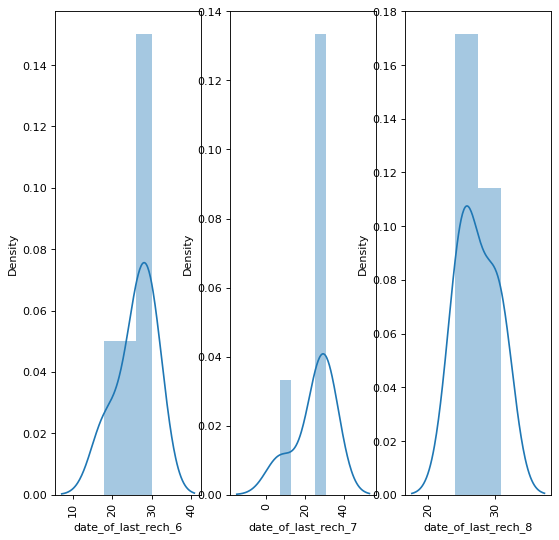

In [57]:
plt.figure(figsize=(8,8), edgecolor="k", dpi=80)
plt.subplot(1,3,1)
sns.distplot(df['date_of_last_rech_6'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.distplot(df['date_of_last_rech_7'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.distplot(df['date_of_last_rech_8'].apply(lambda x: x.day).head())
plt.xticks(rotation=90)

plt.show()

In [58]:

#Convert rech date col into categorical field indicating first half of the month (1-15th) or 2nd half(16th-end of month)
import datetime
date_mid_6 = datetime.datetime.strptime("15-06-2014", "%d-%m-%Y")
date_mid_7 = datetime.datetime.strptime("15-07-2014", "%d-%m-%Y")
date_mid_8 = datetime.datetime.strptime("15-08-2014", "%d-%m-%Y")

print(date_mid_6, date_mid_7, date_mid_8)

def populate_dt_range(dates, date_mid):
    if dates < date_mid:
        return 1
    else:
        return 2
    
df['month_beginning_end_6'] = df.apply(lambda x: populate_dt_range(x['date_of_last_rech_6'],date_mid_6), axis=1)
df['month_beginning_end_7'] = df.apply(lambda x: populate_dt_range(x['date_of_last_rech_7'],date_mid_7), axis=1)
df['month_beginning_end_8'] = df.apply(lambda x: populate_dt_range(x['date_of_last_rech_8'],date_mid_8), axis=1)

df.head()

2014-06-15 00:00:00 2014-07-15 00:00:00 2014-08-15 00:00:00


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_6_1.0,fb_7_1.0,fb_8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,month_beginning_end_6,month_beginning_end_7,month_beginning_end_8
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.0,0.0,0.0,1,2,2,2
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,1,1,0.0,354.0,207.0,0,2,2,2
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.0,0.0,0.0,0,2,2,2
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,1,1,0.0,712.0,540.0,0,2,1,2
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,1,5285.0,20424.0,455.0,0,2,2,2


In [59]:
#Drop date columns now
dt_drop_list=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
print("Shape before: ",df.shape)
df.drop(dt_drop_list, axis=1, inplace=True)
print("Shape after: ",df.shape)

Shape before:  (28119, 142)
Shape after:  (28119, 139)


In [60]:
x = df['churn'].value_counts()
display(x)
round(df['churn'].value_counts()/sum(x)*100,2)

0    26589
1     1530
Name: churn, dtype: int64

0    94.56
1     5.44
Name: churn, dtype: float64

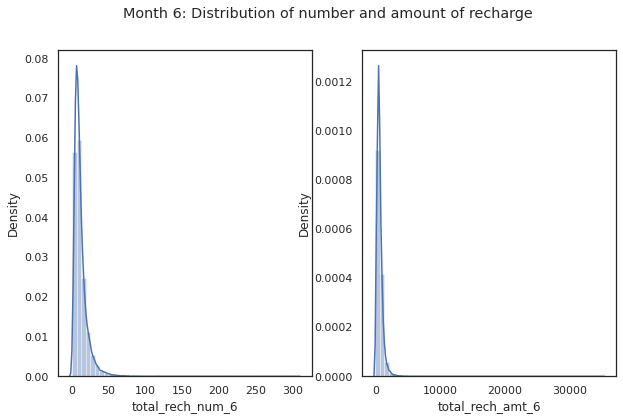

In [61]:
sns.set(style="white")
s = plt.figure(figsize=(10, 6))
s.suptitle("Month 6: Distribution of number and amount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_6'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_6'])
plt.show()

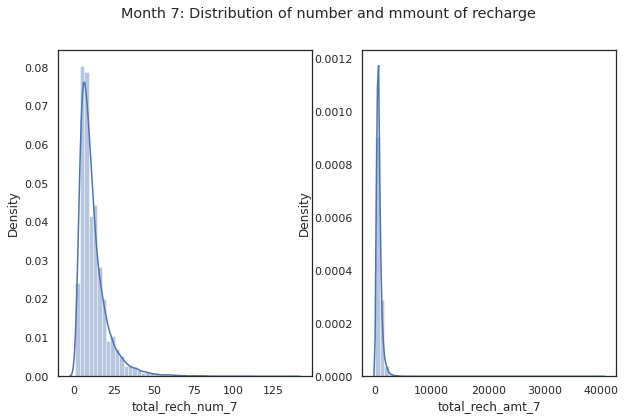

In [62]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 7: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_7'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_7'])

plt.show()

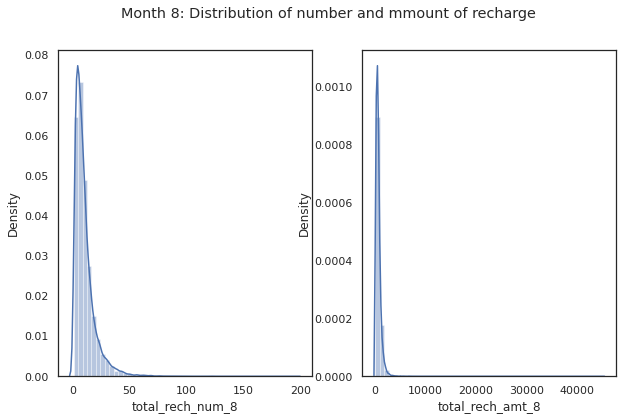

In [63]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 8: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(df['total_rech_num_8'])
plt.subplot(1,2,2)
sns.distplot(df['total_rech_amt_8'])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

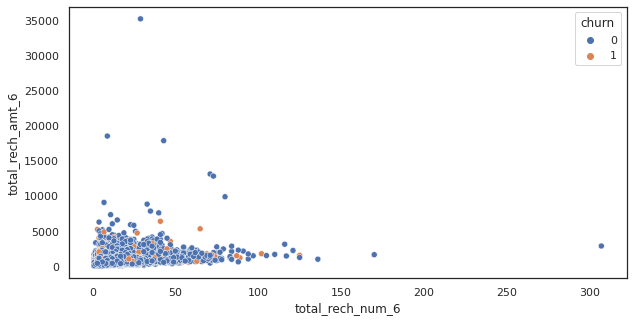

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="total_rech_num_6",y="total_rech_amt_6", hue='churn',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

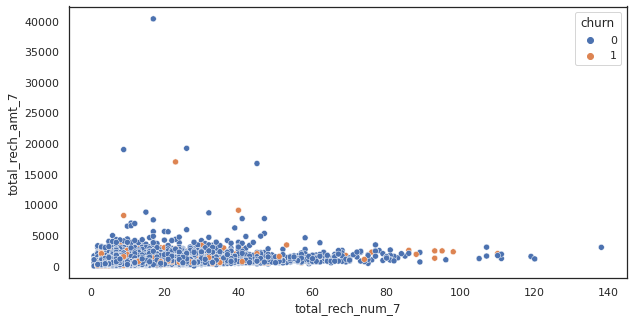

In [65]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="total_rech_num_7",y="total_rech_amt_7", hue='churn',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

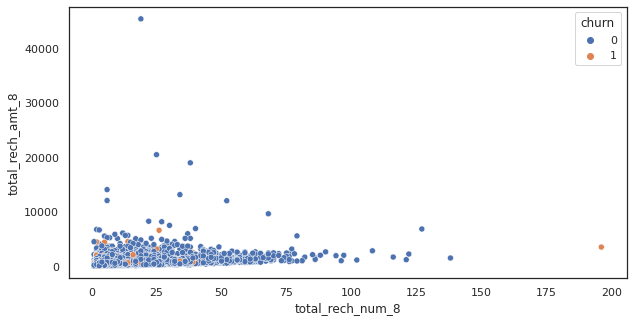

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="total_rech_num_8",y="total_rech_amt_8", hue='churn',data=df)
plt.show

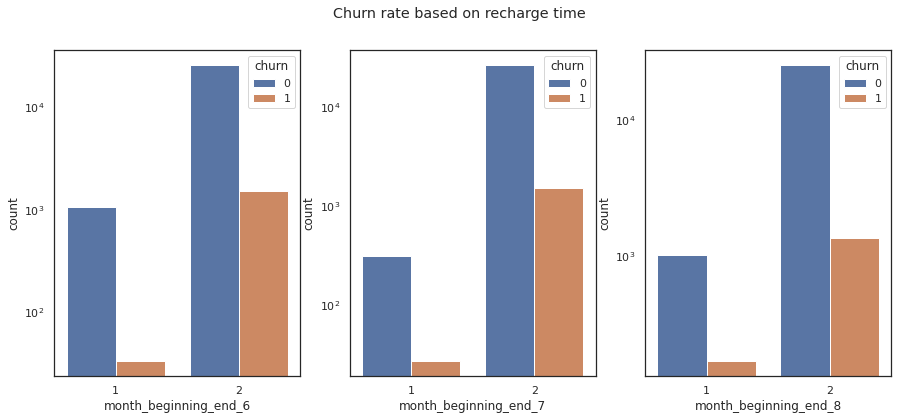

In [67]:

s=plt.figure(figsize=(15,6))
s.suptitle("Churn rate based on recharge time")
#1 -> First half of month, 2 -> Second half of month
plt.subplot(1,3,1)
sns.countplot('month_beginning_end_6',hue="churn", data=df)
plt.yscale('log')
plt.subplot(1,3,2)
sns.countplot('month_beginning_end_7',hue="churn", data=df)
plt.yscale('log')
plt.subplot(1,3,3)
sns.countplot('month_beginning_end_8',hue="churn", data=df)
plt.yscale('log')
plt.show()

In [68]:
col_list = df.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()


Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g',
       'sachet_3g', 'night_6_1', 'night_7_1', 'fb_6_1', 'fb_7_1',
       'total_rech_data_amt', 'month_beginning_end'],
      dtype='object')

In [69]:
l=['night_6_1', 'night_7_1', 'fb_6_1', 'fb_7_1']
for i, col in enumerate(col_list.unique()):
    print(col)
    if col not in l:
        avg_col_name = "goodmonths_"+col
        col_6 = col+"_6"
        col_7 = col+"_7"
        df[avg_col_name] = (df[col_6]  + df[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
night_6_1
night_7_1
fb_6_1
fb_7_1
total_rech_data_amt
month_beginning_end


In [70]:
df.shape

(28119, 181)

In [71]:
col_list = df.filter(regex='_6|_7').columns
for i, col in enumerate(col_list.unique()):
    if col not in l:
        df.drop(col, axis=1, inplace=True)

In [72]:
df.shape

(28119, 93)

<AxesSubplot:>

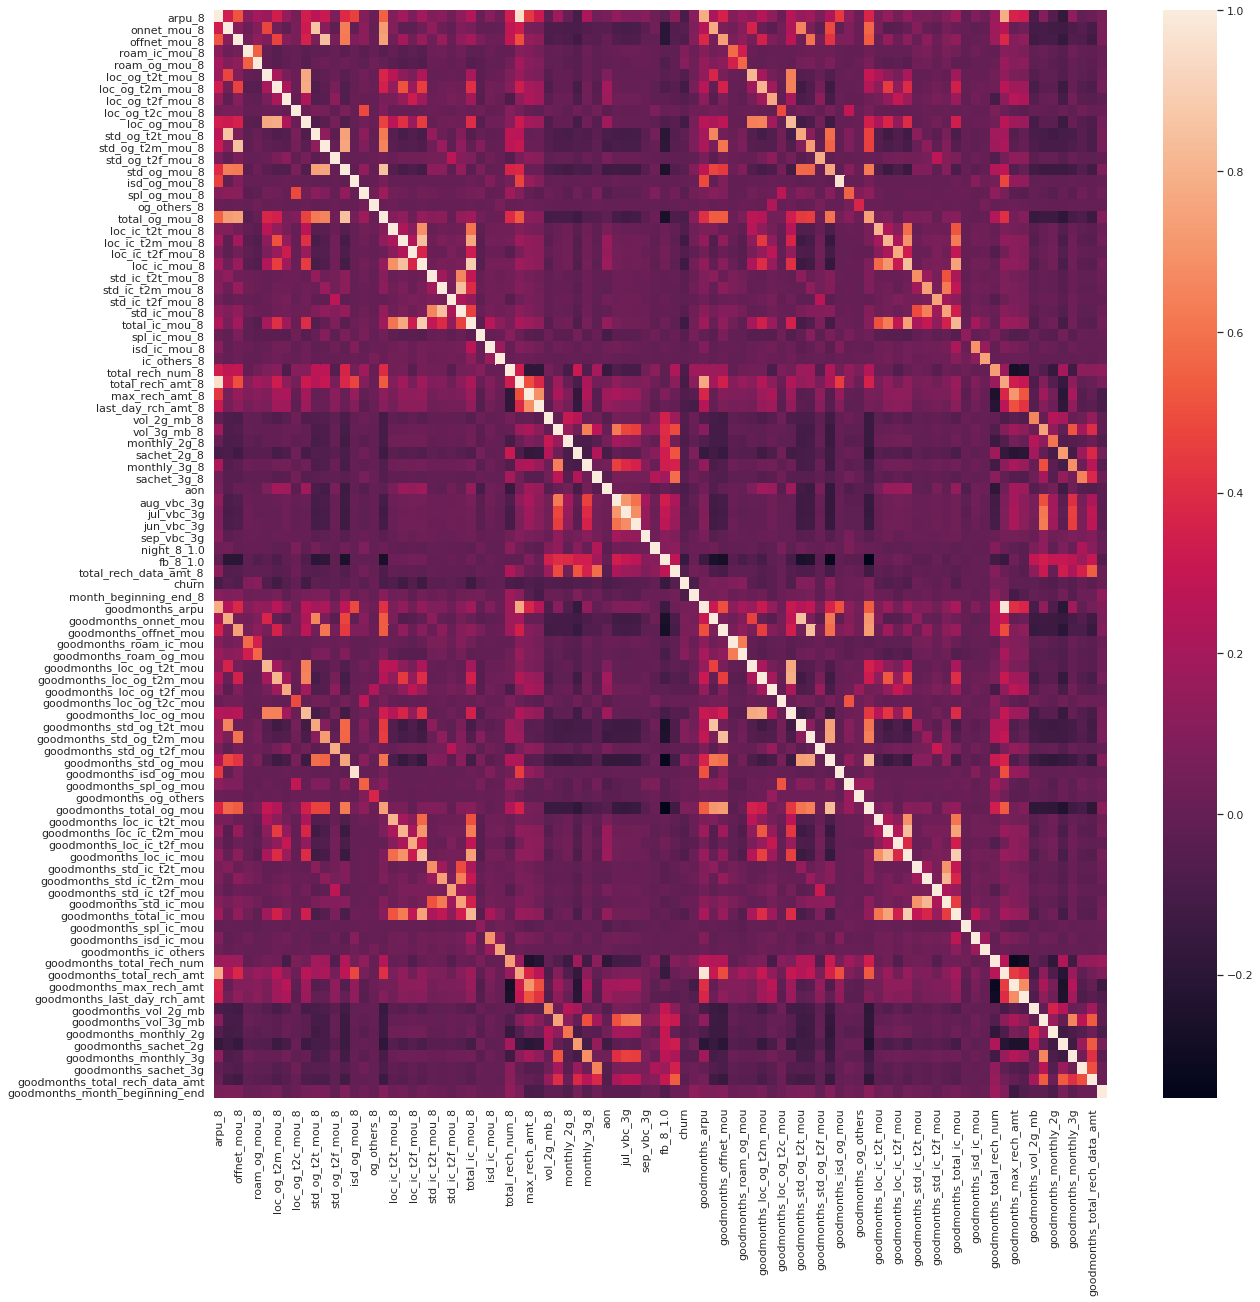

In [73]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('mobile_number',axis=1).corr())

In [74]:
#Breaking down age on network to months from days
df['mon'] = df['aon']/30
df.drop('aon', axis=1, inplace=True)
df['mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: mon, dtype: float64

In [75]:
def compute_years(x):
    if x<=12:
        return "<1"
    elif x<=24 and x>12:
        return "1-2"
    elif x<=60 and x>24:
        return "2-5"
    else:
        return "5+"
    
df['years_with_company'] = df.apply(lambda x: compute_years(x['mon']),axis=1)
df['years_with_company'].unique()

array(['2-5', '<1', '1-2', '5+'], dtype=object)

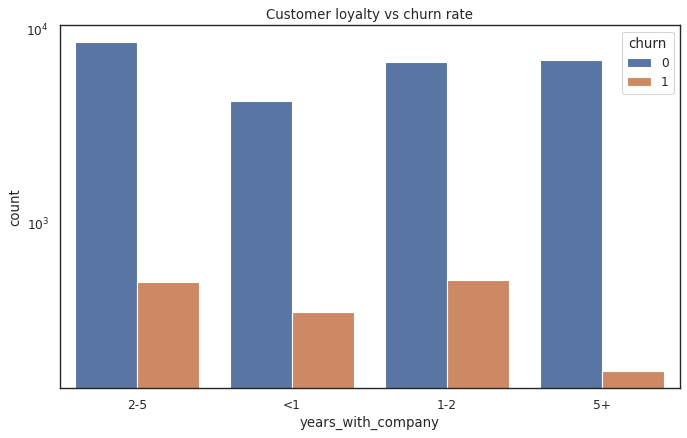

In [76]:
sns.set(style="white")
plt.figure(figsize=(10,6),edgecolor="k",facecolor="w",dpi=80)
sns.countplot(df['years_with_company'],hue=df["churn"])
plt.yscale("log")
plt.title("Customer loyalty vs churn rate")
plt.show()

In [77]:
df.drop('years_with_company', axis=1, inplace=True)

In [78]:
churn_rate = df['churn']
churn_percentage = (sum(churn_rate)/len(churn_rate.index))*100
print(churn_percentage)

5.441160780966606


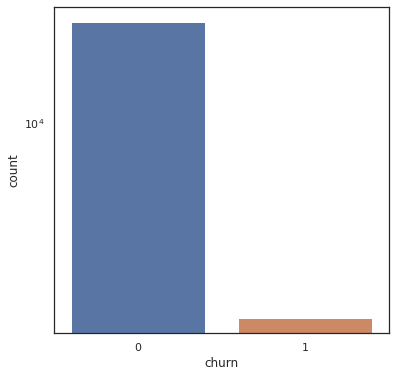

In [79]:
plt.figure(figsize=(6,6))
sns.countplot(x='churn', data=df)
plt.yscale('log')
plt.show()

# Outlier Treatment

In [80]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])
#As we can see we have outlier.

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
count,2.811900e+04,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,...,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000
mean,7.001213e+09,529.340820,246.532381,351.240056,13.157579,20.950316,82.457870,159.381671,6.153570,1.783851,...,98.546161,127.727893,345.139169,0.183346,1.156069,0.214108,0.217504,489.797361,1.974590,41.112056
std,6.874155e+05,500.713039,465.669094,482.739259,76.179348,107.803297,233.578689,235.092407,19.918596,7.328744,...,108.119091,303.868822,790.989165,0.392036,2.437065,0.565825,0.941402,1249.819293,0.114027,32.090133
min,7.000000e+09,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
1%,7.000027e+09,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,6.300000
10%,7.000260e+09,126.796000,0.930000,10.840000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.700000
25%,7.000622e+09,258.314000,15.380000,62.090000,0.000000,0.000000,4.240000,18.680000,0.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.733333
50%,7.001216e+09,445.661000,75.190000,202.180000,0.000000,0.000000,23.960000,76.580000,0.080000,0.000000,...,77.000000,6.560000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,2.000000,29.166667
75%,7.001805e+09,675.428500,260.500000,459.195000,0.000000,0.000000,77.395000,208.035000,4.310000,0.130000,...,124.000000,110.565000,427.562500,0.000000,1.000000,0.000000,0.000000,495.000000,2.000000,60.333333
90%,7.002165e+09,992.968600,691.798000,845.980000,16.832000,32.180000,186.694000,410.766000,15.782000,4.890000,...,198.000000,399.964000,1076.397000,1.000000,4.000000,1.000000,0.500000,1230.000000,2.000000,93.766667


In [81]:
cont_cols = [col for col in df.columns if col not in ['churn']]

for col in cont_cols:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

In [82]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,goodmonths_last_day_rch_amt,goodmonths_vol_2g_mb,goodmonths_vol_3g_mb,goodmonths_monthly_2g,goodmonths_sachet_2g,goodmonths_monthly_3g,goodmonths_sachet_3g,goodmonths_total_rech_data_amt,goodmonths_month_beginning_end,mon
count,2.811900e+04,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,...,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000
mean,7.001213e+09,518.833311,237.266165,341.424017,10.357769,17.008009,73.936883,154.990936,5.543987,1.557049,...,96.148583,121.168084,324.153546,0.180821,1.122444,0.202301,0.183257,448.744770,1.975533,41.091624
std,6.869585e+05,376.927906,398.565181,412.113244,40.551901,63.262879,141.838879,206.631406,13.322634,4.519126,...,90.164805,252.092178,619.398637,0.380590,2.237192,0.482294,0.577735,826.937602,0.107868,32.028488
min,7.000027e+09,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,6.300000
1%,7.000027e+09,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,6.300000
10%,7.000260e+09,126.796000,0.930000,10.840000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.700000
25%,7.000622e+09,258.314000,15.380000,62.090000,0.000000,0.000000,4.240000,18.680000,0.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.733333
50%,7.001216e+09,445.661000,75.190000,202.180000,0.000000,0.000000,23.960000,76.580000,0.080000,0.000000,...,77.000000,6.560000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,2.000000,29.166667
75%,7.001805e+09,675.428500,260.500000,459.195000,0.000000,0.000000,77.395000,208.035000,4.310000,0.130000,...,124.000000,110.565000,427.562500,0.000000,1.000000,0.000000,0.000000,495.000000,2.000000,60.333333
90%,7.002165e+09,992.968600,691.798000,845.980000,16.832000,32.180000,186.694000,410.766000,15.782000,4.890000,...,198.000000,399.964000,1076.397000,1.000000,4.000000,1.000000,0.500000,1230.000000,2.000000,93.766667


In [83]:
X = df.drop(['churn'],axis=1)
y = df['churn']

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19683, 92)
(8436, 92)
(19683,)
(8436,)


# PCA 

In [86]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [87]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [88]:
print(pca.components_)

# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head(10)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9]})
pcs_df.head(10)

[[ 2.58584791e-02  2.06907977e-01  1.17315101e-01 ... -7.41054974e-02
   2.72473585e-02  5.72413917e-02]
 [-2.53299122e-02  3.99736062e-02  1.60283627e-01 ... -1.01860982e-01
   3.96773863e-02 -9.09237575e-02]
 [-2.51488816e-02  1.66055501e-01  4.43335835e-02 ...  1.72662381e-01
  -1.24334863e-02 -4.03988635e-02]
 ...
 [ 1.08672410e-04 -7.78265196e-03  3.27776653e-01 ... -3.31516722e-03
  -1.31688418e-04  4.78956117e-04]
 [ 2.85087443e-04  4.34433698e-03 -1.70091892e-01 ...  1.32531795e-03
  -1.08788664e-04 -4.07429877e-04]
 [-0.00000000e+00 -4.77458842e-16  7.43346287e-16 ... -6.85053457e-17
   2.07679152e-17  2.17453979e-17]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.025858,-0.025330,-0.025149,-0.026820,-0.043843,0.005899,0.014772,0.032519,-0.052797,-0.013044
1,0.206908,0.039974,0.166056,0.079524,-0.060644,-0.062299,0.053335,0.095283,-0.058560,0.096727
2,0.117315,0.160284,0.044334,0.068178,-0.055587,0.327162,0.020839,0.092103,-0.072632,0.049081
3,0.182665,0.110883,0.041806,0.042282,-0.021967,-0.292946,-0.055669,-0.096070,-0.057838,0.083090
4,0.024935,0.018481,0.063032,-0.105443,-0.004394,-0.034862,0.421063,-0.040485,0.006844,0.026583
5,0.028835,0.041759,0.065540,-0.096119,-0.034209,-0.044164,0.424758,-0.039742,-0.005284,0.029971
6,0.145805,-0.045243,-0.081597,0.111144,-0.082363,0.155118,0.088232,0.022005,-0.043755,0.012828
7,0.189145,-0.084195,-0.086346,0.082632,-0.067699,-0.119163,0.010044,-0.015253,-0.057808,-0.004294
8,0.104137,-0.100585,-0.007228,-0.084373,-0.044855,-0.046121,-0.070074,0.124588,-0.197378,-0.090798
9,0.018933,0.031707,0.018647,0.086950,0.051215,0.008390,-0.019159,0.059542,-0.107794,-0.049431


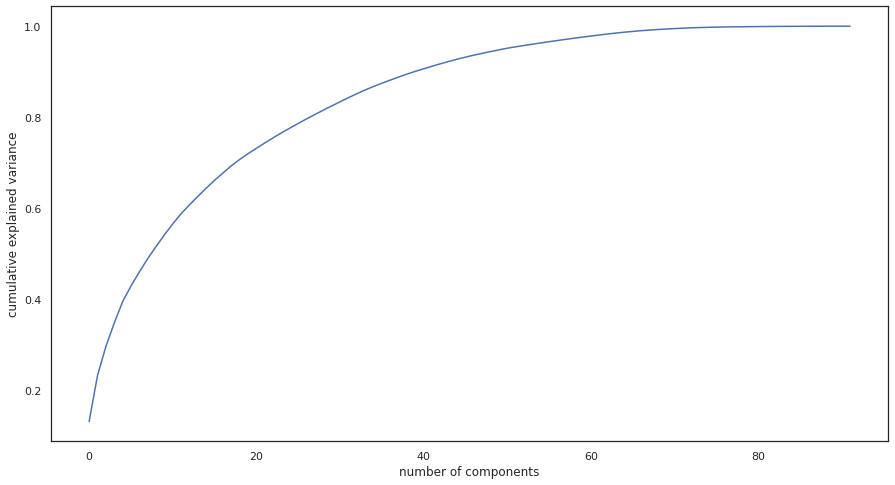

In [89]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [90]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19683, 40)

In [91]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

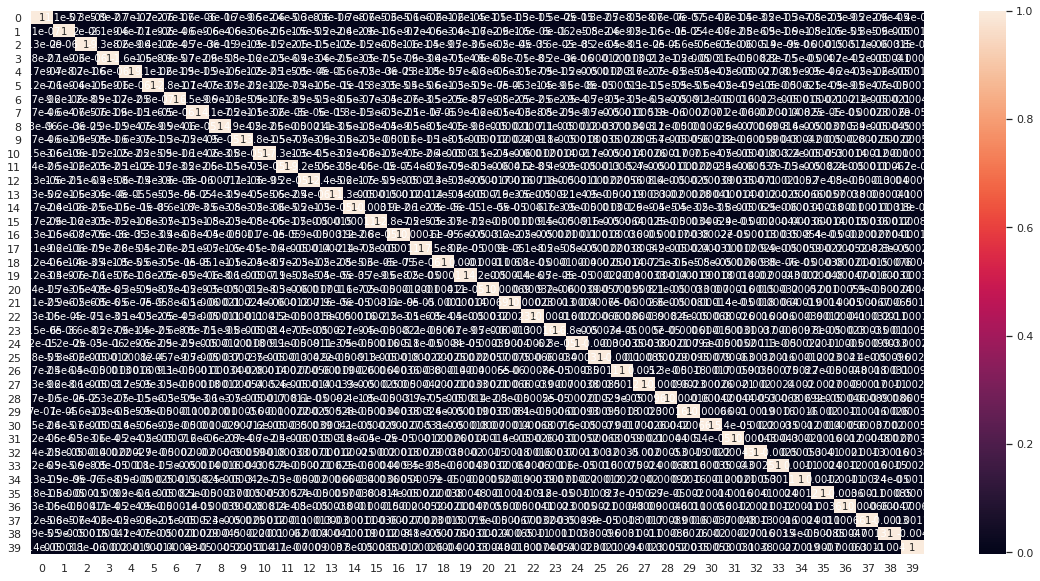

In [92]:
#plotting the correlation matrix

plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [93]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.004099445731772301 , min corr:  -0.003972517154245231


In [94]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8436, 40)

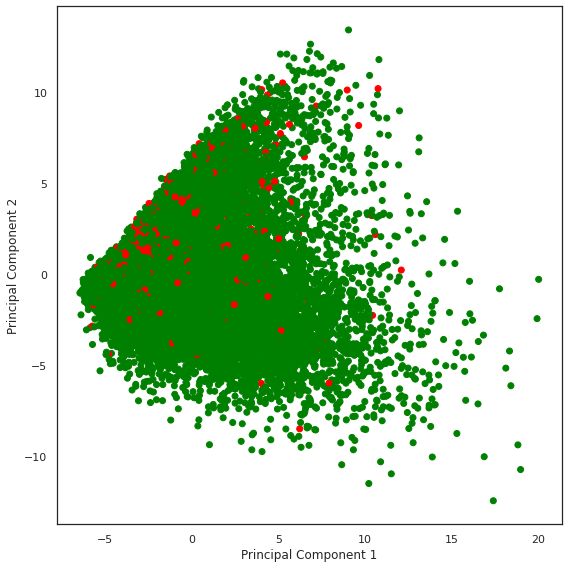

In [95]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# 1) LogisticRegression model with PCA


In [96]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [97]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [98]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6437 1527]
 [ 105  367]]
0.8065433854907539


In [99]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [100]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8579880649362809


# ROC Curve

In [101]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

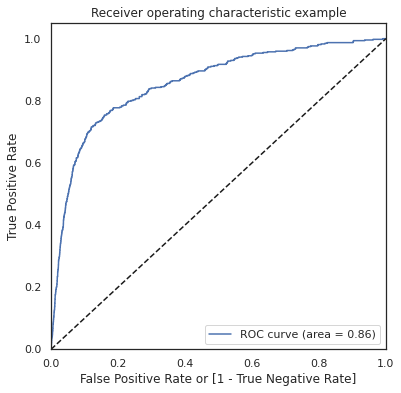

(array([0.00000000e+00, 1.25565043e-04, 2.51130085e-04, ...,
        9.99748870e-01, 9.99874435e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99677774e+00, 9.96777741e-01, 9.95282126e-01, ...,
        6.98832760e-06, 4.96020973e-06, 3.78766919e-06]))

In [102]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [103]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.068855,1,0,0,0,0,0,0,0,0,0
1,0,0.737167,1,1,1,1,1,1,1,1,0,0
2,0,0.032872,1,0,0,0,0,0,0,0,0,0
3,0,0.200575,1,1,1,0,0,0,0,0,0,0
4,1,0.928664,1,1,1,1,1,1,1,1,1,1


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.055951  0.000000  1.000000
0.1   0.1  0.337956  0.301105  0.959746
0.2   0.2  0.507942  0.483677  0.917373
0.3   0.3  0.628378  0.614139  0.868644
0.4   0.4  0.724040  0.718232  0.822034
0.5   0.5  0.806543  0.808262  0.777542
0.6   0.6  0.866643  0.875565  0.716102
0.7   0.7  0.902916  0.919513  0.622881
0.8   0.8  0.928046  0.955299  0.468220
0.9   0.9  0.939426  0.981291  0.233051


<AxesSubplot:xlabel='prob'>

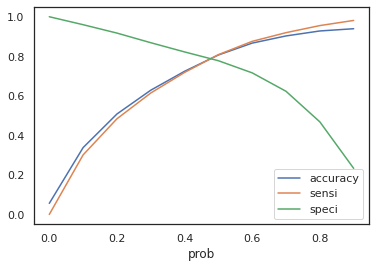

In [105]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [106]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.47108108161031337]


In [107]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    7964
1     472
Name: churn, dtype: int64

In [108]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6384, 1580],
       [ 105,  367]])

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))


# Let's see the sensitivity of our logistic regression model
print('Sensitivity = Recall: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value : ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

a=  TP / float(TP+FP) 
b = TP / float(TP+FN) 
c= 2*a*b/(a+b)
print('f1-score:',c)


Accuracy Score on test data:  0.8065433854907539
Sensitivity = Recall:  0.777542372881356
Specificity:  0.801607232546459
false postive rate:  0.19839276745354092
positive predictive value :  0.18849512069851052
Negative predictive value:  0.9838187702265372
Misclassification Rate:  0.19973921289710764
f1-score: 0.30343116990491936


# 2) DecisionTreeClassifier With PCA

In [116]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [117]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7964
           1       0.16      0.64      0.26       472

    accuracy                           0.80      8436
   macro avg       0.57      0.72      0.57      8436
weighted avg       0.93      0.80      0.85      8436

[[6415 1549]
 [ 171  301]]
Acuracy Score 0.7961119013750593


In [118]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7961119013750593
Sensitivity:  0.6377118644067796
Specificity:  0.8054997488699146
false postive rate:  0.19450025113008537
positive predictive value:  0.1627027027027027
Negative predictive value:  0.9740358335863953
Misclassification Rate:  0.20388809862494073


# Hyperparameter tuning on Decision Tree

In [119]:
########## lets tune hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [120]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074349,0.014435,0.000969,0.000017,1,{'max_depth': 1},0.585979,0.505461,0.493269,0.575203,...,0.549208,0.041071,39,0.585990,0.496952,0.500572,0.582016,0.587350,0.550576,0.042358
1,0.122986,0.002541,0.000976,0.000023,2,{'max_depth': 2},0.772416,0.787656,0.775464,0.773374,...,0.775593,0.006376,35,0.776388,0.778166,0.773847,0.774052,0.778243,0.776139,0.001908
2,0.259943,0.045387,0.001511,0.000515,3,{'max_depth': 3},0.694691,0.721869,0.780036,0.816819,...,0.766911,0.050691,37,0.692366,0.720564,0.783945,0.822887,0.834953,0.770943,0.055994
3,0.227038,0.002059,0.001049,0.000034,4,{'max_depth': 4},0.726949,0.750064,0.719583,0.735518,...,0.736677,0.012493,38,0.736505,0.746031,0.722025,0.747317,0.762875,0.742950,0.013454
4,0.271386,0.000598,0.001044,0.000015,5,{'max_depth': 5},0.755398,0.774956,0.763272,0.787602,...,0.774985,0.014355,36,0.766607,0.773784,0.770227,0.793548,0.818886,0.784611,0.019508


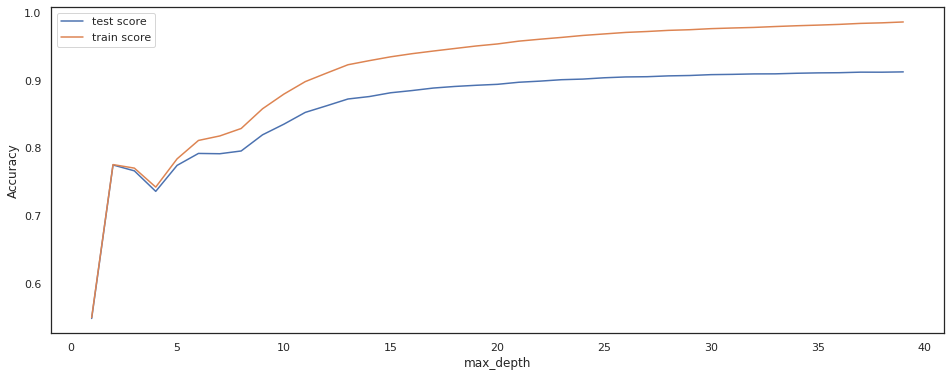

In [108]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_max_depth"],scores["mean_test_score"])
plt.plot(scores["param_max_depth"], scores["mean_train_score"])
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

# seems 15 or 20 Max depth

In [109]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [110]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.150997,0.141383,0.002645,0.000897,5,{'min_samples_leaf': 5},0.884430,0.889764,0.890526,0.889228,...,0.887517,0.002885,1,0.953321,0.957577,0.957704,0.957516,0.955738,0.956371,0.001688
1,0.936589,0.087481,0.001873,0.000434,25,{'min_samples_leaf': 25},0.814834,0.805436,0.802896,0.809959,...,0.811361,0.007383,2,0.855455,0.843833,0.849232,0.844605,0.864228,0.851471,0.007604
2,0.878632,0.138312,0.002045,0.000900,45,{'min_samples_leaf': 45},0.787148,0.784608,0.772162,0.784807,...,0.781842,0.005294,3,0.809285,0.809475,0.807316,0.815965,0.809615,0.810331,0.002938
3,0.659325,0.106973,0.001516,0.000038,65,{'min_samples_leaf': 65},0.783846,0.766828,0.768098,0.773374,...,0.766650,0.014110,4,0.806427,0.792265,0.794869,0.792468,0.777545,0.792715,0.009198
4,0.599642,0.064688,0.001852,0.000733,85,{'min_samples_leaf': 85},0.776226,0.764034,0.754636,0.765244,...,0.759995,0.012185,5,0.799124,0.777721,0.777023,0.782498,0.772592,0.781792,0.009218


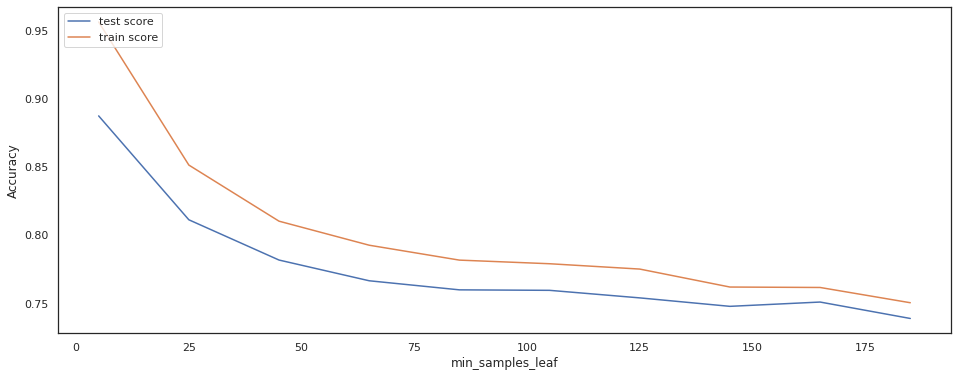

In [111]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"])
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"])
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

#seems 5 to 150

In [112]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy"
                   , return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [113]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.133490,0.064590,0.001792,0.000081,5,{'min_samples_split': 5},0.912878,0.916942,0.913894,0.912093,...,0.914291,0.001781,1,0.995300,0.996317,0.994538,0.996952,0.996380,0.995897,0.000863
1,0.908642,0.072506,0.002025,0.000664,25,{'min_samples_split': 25},0.879096,0.879096,0.878842,0.881098,...,0.880252,0.001653,2,0.945891,0.948495,0.946971,0.947927,0.952118,0.948280,0.002113
2,0.795199,0.075242,0.001628,0.000052,45,{'min_samples_split': 45},0.845314,0.842012,0.844552,0.854675,...,0.847077,0.004381,3,0.903404,0.903912,0.907659,0.911983,0.912682,0.907928,0.003891
3,0.778426,0.075132,0.001596,0.000039,65,{'min_samples_split': 65},0.830328,0.820676,0.822708,0.826982,...,0.826297,0.004035,4,0.882446,0.875397,0.878572,0.880422,0.890265,0.881420,0.004993
4,0.787896,0.098028,0.001587,0.000162,85,{'min_samples_split': 85},0.816612,0.800864,0.800356,0.808943,...,0.809735,0.008516,5,0.866252,0.850565,0.850057,0.860100,0.874071,0.860209,0.009217


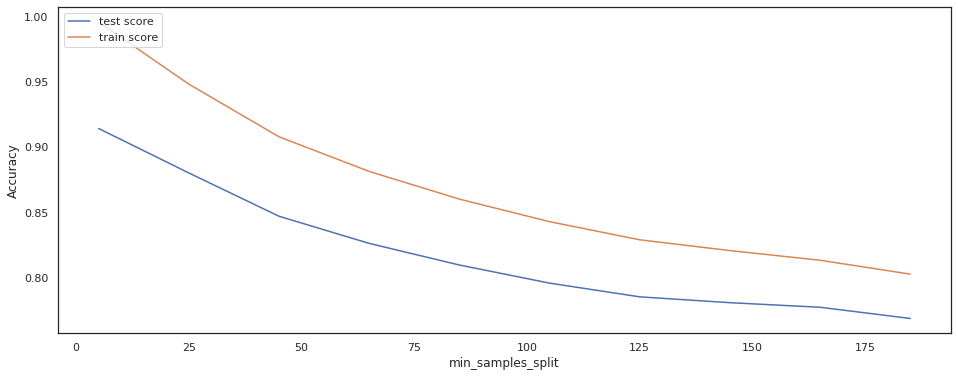

In [114]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_min_samples_split"],scores["mean_test_score"])
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"])
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()


#seems 25

In [557]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 10.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', return_train_score=True, verbose=1)

In [558]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.079142,0.295750,0.002126,0.000411,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750826,...,0.778235,0.020278,37,0.765337,0.816017,0.78096,0.799327,0.782054,0.788739,0.017373
1,1.450277,0.073295,0.002590,0.000810,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750826,...,0.778235,0.020278,37,0.765337,0.816017,0.78096,0.799327,0.782054,0.788739,0.017373
2,1.383173,0.057398,0.002171,0.000243,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750826,...,0.778235,0.020278,37,0.765337,0.816017,0.78096,0.799327,0.782054,0.788739,0.017373
3,1.348590,0.047289,0.002119,0.000040,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750826,...,0.778235,0.020278,37,0.765337,0.816017,0.78096,0.799327,0.782054,0.788739,0.017373
4,1.376728,0.054094,0.002202,0.000150,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750826,...,0.778235,0.020278,37,0.765337,0.816017,0.78096,0.799327,0.782054,0.788739,0.017373


In [559]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8276686831828949
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [121]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [122]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6701, 1263],
       [ 183,  289]])

In [123]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


a=  TP / float(TP+FP) 
b = TP / float(TP+FN) 
c= 2*a*b/(a+b)
print('f1-score:',c)

Acuracy Score 0.8285917496443812
Sensitivity:  0.6122881355932204
Specificity:  0.8414113510798593
false postive rate:  0.15858864892014063
positive predictive value:  0.18621134020618557
Negative predictive value:  0.9734166182452063
Misclassification Rate:  0.17140825035561877
f1-score: 0.2855731225296443


# 3) RandomForestClassifier with PCA

In [124]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [125]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7933,   31],
       [ 428,   44]])

In [138]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8918918918918919
Sensitivity:  0.6292372881355932
Specificity:  0.9074585635359116
false postive rate:  0.0925414364640884
positive predictive value:  0.2872340425531915
Negative predictive value:  0.9763577411510402
Misclassification Rate:  0.10810810810810811


# Hyperparameter tuning for RandomForest

In [126]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                    return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [570]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.115074,0.452854,0.054228,0.001033,2,{'max_depth': 2},0.833630,0.822962,0.824486,0.838669,...,0.826754,0.008612,4,0.831132,0.819383,0.826813,0.832921,0.827840,0.827618,0.004669
1,10.442846,0.259240,0.077606,0.000803,7,{'max_depth': 7},0.896876,0.909576,0.898146,0.903455,...,0.899761,0.006357,3,0.914963,0.918074,0.914454,0.916810,0.916683,0.916197,0.001319
2,12.772505,0.397586,0.111964,0.025928,12,{'max_depth': 12},0.929388,0.936754,0.930150,0.931402,...,0.929888,0.004817,2,0.964372,0.966531,0.964435,0.965390,0.963168,0.964779,0.001125
3,12.222558,1.275928,0.086576,0.014123,17,{'max_depth': 17},0.940310,0.939294,0.939040,0.938262,...,0.937712,0.003098,1,0.980122,0.978788,0.977201,0.978282,0.975297,0.977938,0.001620


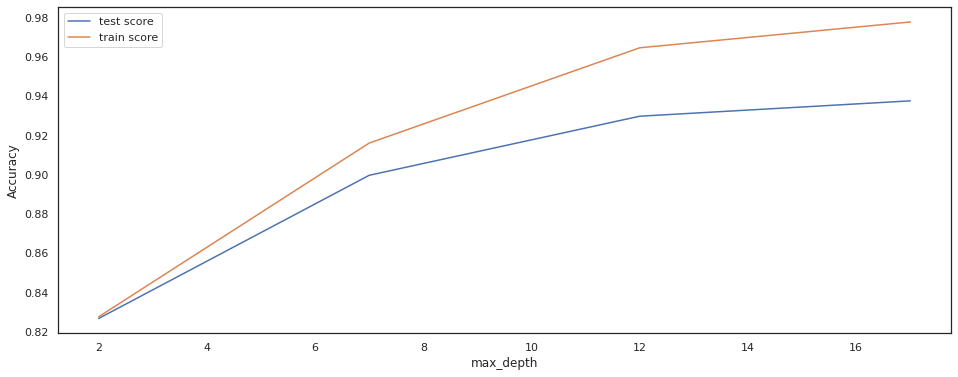

In [571]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_max_depth"],scores["mean_test_score"])
plt.plot(scores["param_max_depth"], scores["mean_train_score"])
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

# seems 15 or 20 Max depth

In [116]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.240076,0.352945,0.091453,0.002583,100,{'n_estimators': 100},0.924562,0.930912,0.921768,0.927083,...,0.924097,0.004980,1,0.954084,0.953703,0.952813,0.953959,0.950467,0.953005,0.001345
1,62.824413,1.548976,0.479230,0.054265,500,{'n_estimators': 500},0.923038,0.932182,0.922784,0.925813,...,0.923385,0.006154,4,0.953194,0.953957,0.952686,0.955039,0.951927,0.953361,0.001069
2,108.933721,2.101327,1.019723,0.486199,900,{'n_estimators': 900},0.924054,0.931674,0.924054,0.926067,...,0.924046,0.005580,2,0.953258,0.954592,0.953576,0.954404,0.951991,0.953564,0.000931
3,146.042398,21.533434,1.027161,0.205129,1300,{'n_estimators': 1300},0.923546,0.933452,0.923292,0.924797,...,0.923690,0.006377,3,0.952940,0.954782,0.953703,0.955166,0.952054,0.953729,0.001149


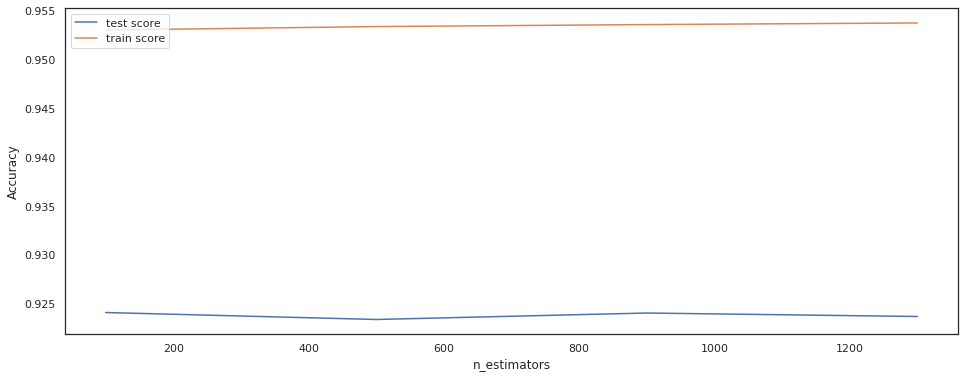

In [118]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_n_estimators"],scores["mean_test_score"])
plt.plot(scores["param_n_estimators"], scores["mean_train_score"])
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [119]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.775475,0.193986,0.085057,0.002678,100,{'min_samples_leaf': 100},0.888240,0.898654,0.891796,0.894563,...,0.891124,0.005549,1,0.903595,0.902007,0.903341,0.903855,0.900552,0.902670,0.001235
1,8.858528,0.159856,0.082800,0.004337,150,{'min_samples_leaf': 150},0.876810,0.890780,0.882906,0.887703,...,0.881166,0.008250,2,0.886638,0.891337,0.890829,0.893567,0.890392,0.890553,0.002242
2,8.232482,0.163410,0.077981,0.003613,200,{'min_samples_leaf': 200},0.870968,0.884938,0.882398,0.878557,...,0.875984,0.008002,3,0.880605,0.882637,0.886003,0.886137,0.885057,0.884088,0.002147
3,7.703748,0.186749,0.080998,0.008761,250,{'min_samples_leaf': 250},0.868682,0.876810,0.872238,0.865854,...,0.868312,0.006334,4,0.873746,0.875016,0.875778,0.874389,0.877183,0.875222,0.001189
4,7.498070,0.159077,0.072924,0.004578,300,{'min_samples_leaf': 300},0.867666,0.869444,0.866396,0.867886,...,0.865671,0.004461,5,0.869618,0.869046,0.868665,0.870769,0.874706,0.870561,0.002191


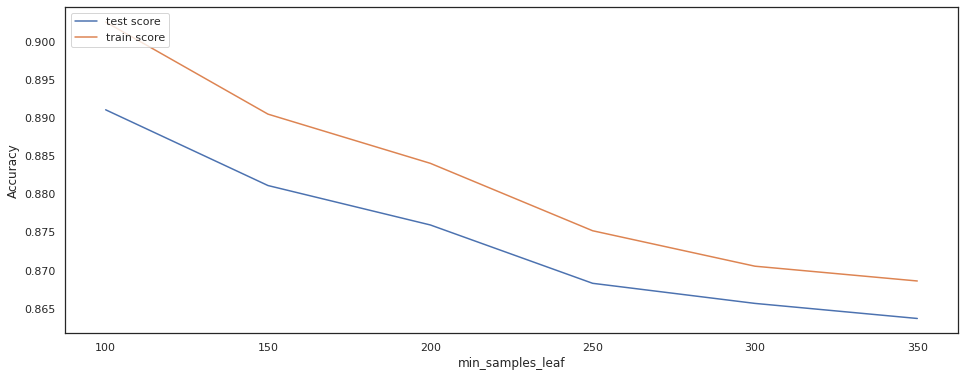

In [121]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"])
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"])
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

#seems 100 to 150

In [122]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.170390,0.306518,0.046581,0.007181,200,{'min_samples_split': 200},0.906020,0.920752,0.910084,0.911585,...,0.910532,0.005762,1,0.929061,0.931221,0.930077,0.931924,0.929193,0.930295,0.001122
1,4.588151,0.188363,0.037260,0.000665,250,{'min_samples_split': 250},0.901448,0.916434,0.904750,0.908028,...,0.905553,0.006533,2,0.920551,0.921758,0.921821,0.924113,0.920683,0.921785,0.001277
2,4.299407,0.139550,0.037267,0.002450,300,{'min_samples_split': 300},0.897638,0.911354,0.899670,0.904217,...,0.900421,0.007315,3,0.914454,0.914264,0.917439,0.915857,0.914333,0.915270,0.001233
3,4.069567,0.024028,0.037214,0.001481,350,{'min_samples_split': 350},0.893066,0.904750,0.895098,0.901677,...,0.896510,0.006027,4,0.907024,0.911279,0.908929,0.911348,0.911348,0.909986,0.001748
4,4.472259,0.240071,0.040943,0.013454,400,{'min_samples_split': 400},0.889764,0.900940,0.894082,0.898120,...,0.893512,0.005818,5,0.902705,0.903086,0.906516,0.906776,0.906395,0.905096,0.001804


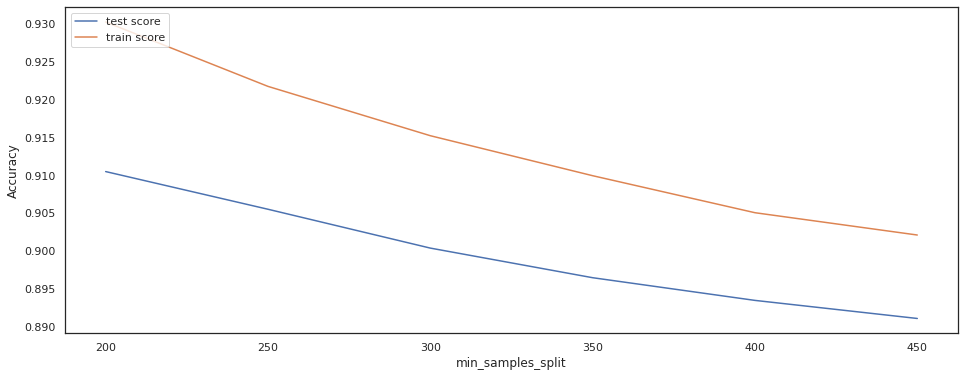

In [124]:
# plotting results
plt.figure(figsize=(16,6))

plt.plot(scores["param_min_samples_split"],scores["mean_test_score"])
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"])
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

# 200 to 300

In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [126]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [127]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.889650795765006 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [127]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [128]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [129]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [139]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7964
           1       0.29      0.63      0.39       472

    accuracy                           0.89      8436
   macro avg       0.63      0.77      0.67      8436
weighted avg       0.94      0.89      0.91      8436

[[7227  737]
 [ 175  297]]
accuracy_score:   0.8918918918918919


In [130]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7210,  754],
       [ 178,  294]])

In [131]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


a=  TP / float(TP+FP) 
b = TP / float(TP+FN) 
c= 2*a*b/(a+b)
print('f1-score:',c)

Accuracy Score:   0.8895211000474158
Sensitivity:  0.6228813559322034
Specificity:  0.9053239578101456
false postive rate:  0.09467604218985434
positive predictive value:  0.28053435114503816
Negative predictive value:  0.9759068760151597
Misclassification Rate:  0.11047889995258417
f1-score: 0.38684210526315793


# Report

1) Logistic Regression with PCA

•Accuracy Score on test data:  0.8065433854907539

•Sensitivity:  0.777542372881356

•Specificity:  0.801607232546459

2) Decision Tree with PCA & Hypertuning

•Accuracy Score:   0.8918918918918919

•Sensitivity:  0.6292372881355932

•Specificity:  0.9074585635359116

3) Random Forrest with PCA & Hypertuning

•Accuracy Score:   0.8918918918918919

•Sensitivity:  0.6292372881355932

•Specificity:  0.9074585635359116

Random Forrest model did best in terms of accuracy where as Logistic Regression model did well in terms of sensitivity.

# Important features to consider churn

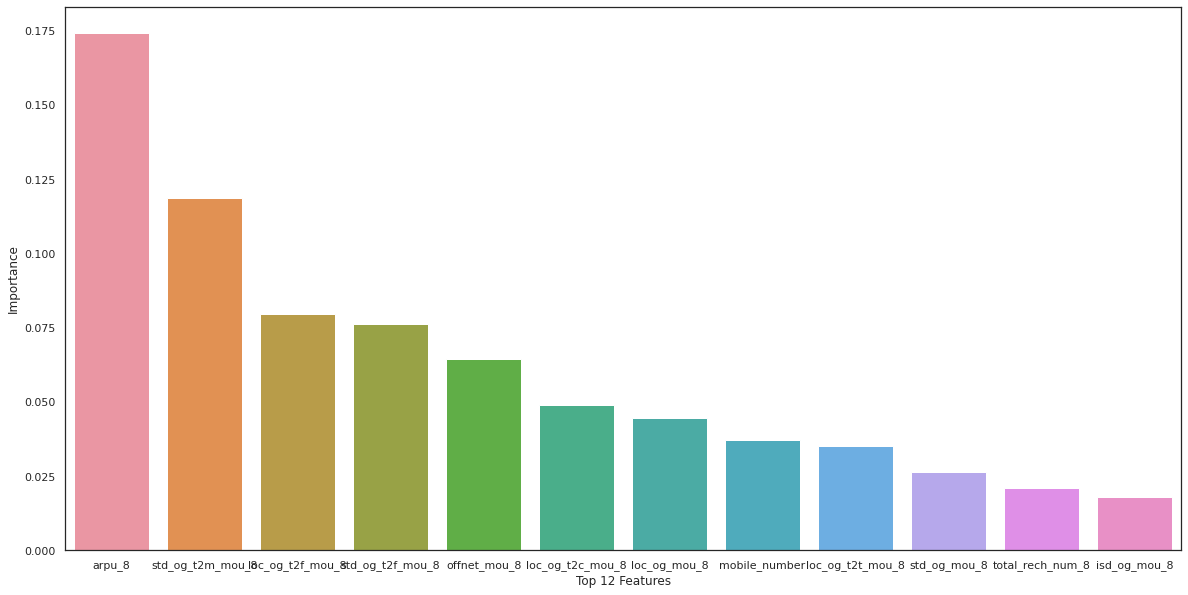

In [148]:
imp=rfc.feature_importances_
names=df.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()